LOAD DATASET FLIPKART SENTIMENT ANALYSIS

In [28]:
#Download dataset
path = kagglehub.dataset_download("niraliivaghani/flipkart-product-customer-reviews-dataset")
print("Dataset downloaded to:", path)

Dataset downloaded to: /kaggle/input/flipkart-product-customer-reviews-dataset


In [29]:
#Load correct file
df = pd.read_csv(f"{path}/Dataset-SA.csv")

DATASET

In [30]:
df

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
...,...,...,...,...,...,...
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive


DATA CLEANING

In [31]:
df.isnull()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
205047,False,False,False,False,False,False
205048,False,False,False,False,False,False
205049,False,False,False,False,False,False
205050,False,False,False,False,False,False


EXPLORATORY DATA ANALYSIS

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [33]:
df.describe()

,product_name,product_price,Rate,Review,Summary,Sentiment
count,205052,205052,205052,180388,205041,205052
unique,958,525,8,1324,92923,3
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,good,positive
freq,6005,9150,118765,9016,17430,166581


Most Common Words per Sentiment (WordCloud)

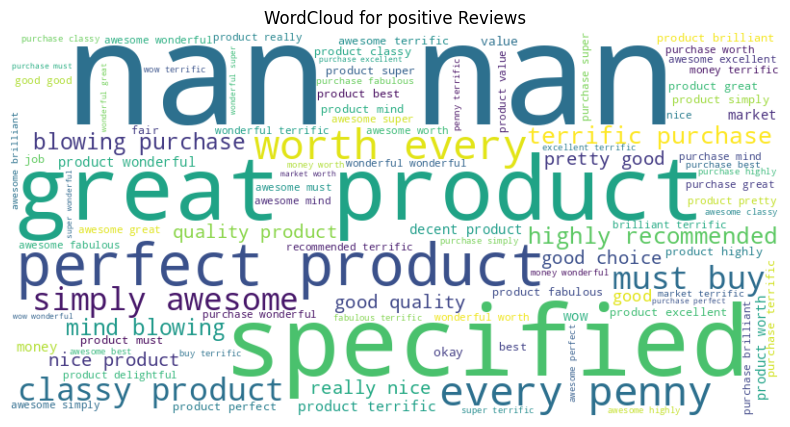

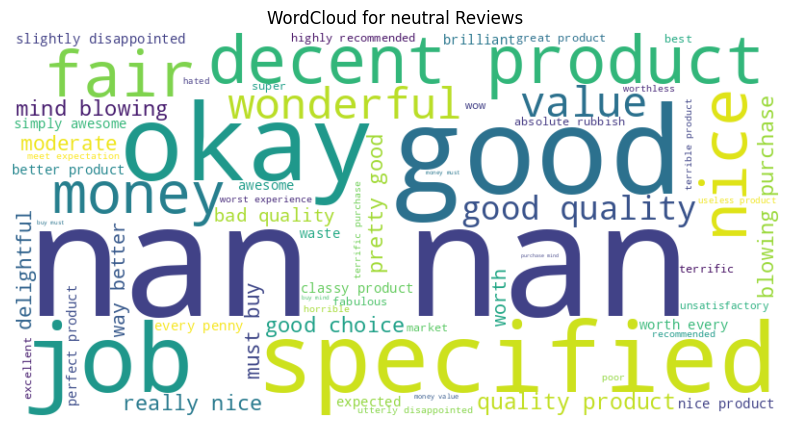

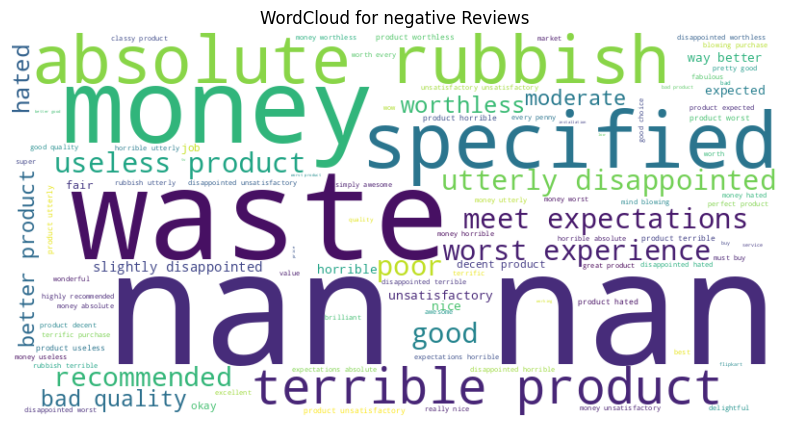

In [34]:
from wordcloud import WordCloud

# Function to plot wordcloud for a sentiment
def plot_wordcloud(sentiment_label):
    text = " ".join(review for review in df[df['Sentiment'] == sentiment_label]['Review'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment_label} Reviews")
    plt.show()

# Wordclouds for each sentiment
plot_wordcloud('positive')
plot_wordcloud('neutral')
plot_wordcloud('negative')



Rating vs Review Length

<ipython-input-35-2695955078>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='review_length', data=df, palette="Set2")


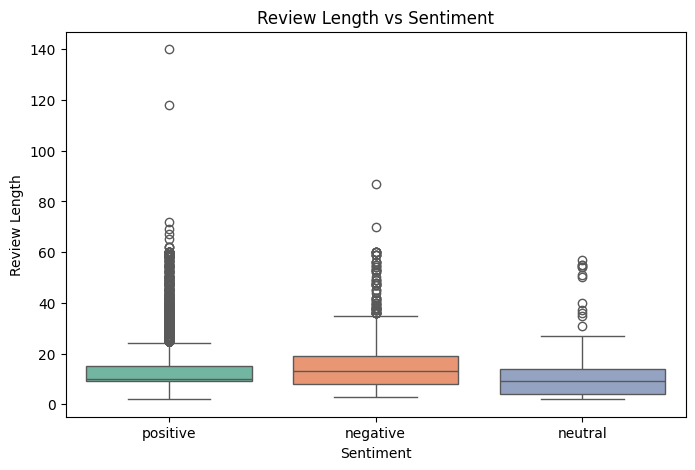

In [35]:
# Add a column with review length
df['review_length'] = df['Review'].astype(str).apply(len)

# Scatter plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Sentiment', y='review_length', data=df, palette="Set2")
plt.title("Review Length vs Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Review Length")
plt.show()


Feature Importance (Top Words)

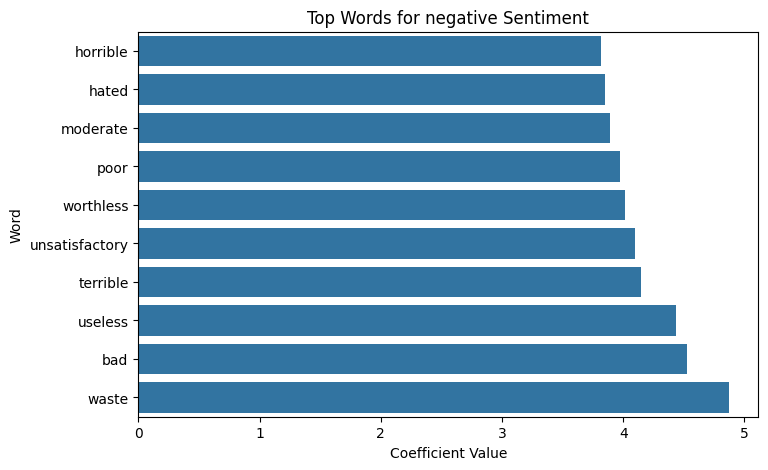

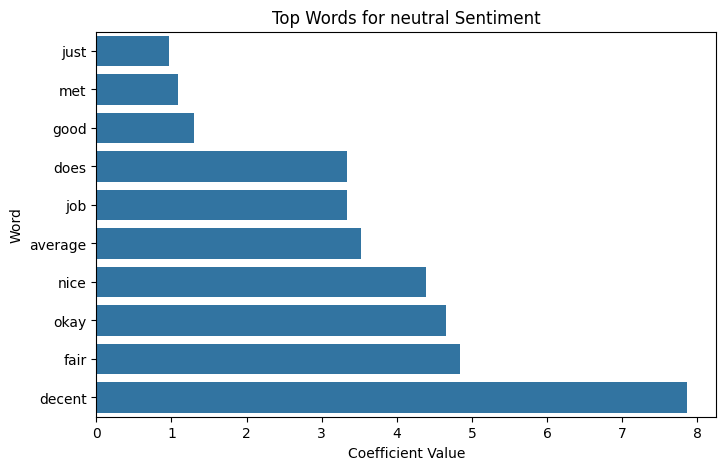

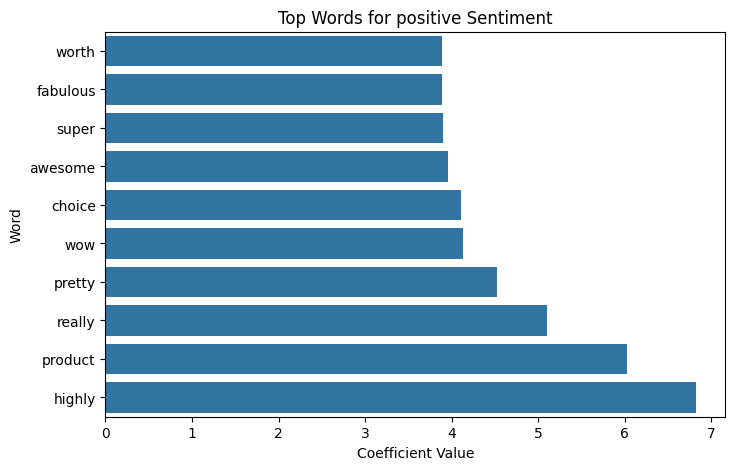

In [24]:
# Get feature names and coefficients
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_

# For each sentiment, plot top 10 positive coefficients
for i, sentiment in enumerate(model.classes_):
    top10 = coefficients[i].argsort()[-10:]
    plt.figure(figsize=(8, 5))
    sns.barplot(x=coefficients[i][top10], y=feature_names[top10])
    plt.title(f"Top Words for {sentiment} Sentiment")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Word")
    plt.show()


In [36]:
print("Columns:", df.columns)
df = df[['Review', 'Rate']]  # Using 'Rate' as rating column

# Drop rows with missing data
df.dropna(subset=['Review', 'Rate'], inplace=True)

Columns: Index(['product_name', 'product_price', 'Rate', 'Review', 'Summary',
       'Sentiment', 'review_length'],
      dtype='object')


<ipython-input-36-2440193932>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Review', 'Rate'], inplace=True)


In [37]:
# Convert ratings to sentiments
def get_sentiment(rating):
    try:
        rating = float(rating)
        if rating >= 4:
            return 'positive'
        elif rating == 3:
            return 'neutral'
        else:
            return 'negative'
    except:
        return 'neutral'

df['sentiment'] = df['Rate'].apply(get_sentiment)

<ipython-input-37-3276185703>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['Rate'].apply(get_sentiment)


In [38]:
X = df['Review']
y = df['sentiment']


In [39]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)
X_vec = vectorizer.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


MODEL TRAINING-LOGIOSTIC REGRESSION

In [41]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [42]:
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    negative       0.99      0.90      0.95      4614
     neutral       0.99      0.77      0.87      2884
    positive       0.96      1.00      0.98     28580

    accuracy                           0.97     36078
   macro avg       0.98      0.89      0.93     36078
weighted avg       0.97      0.97      0.97     36078



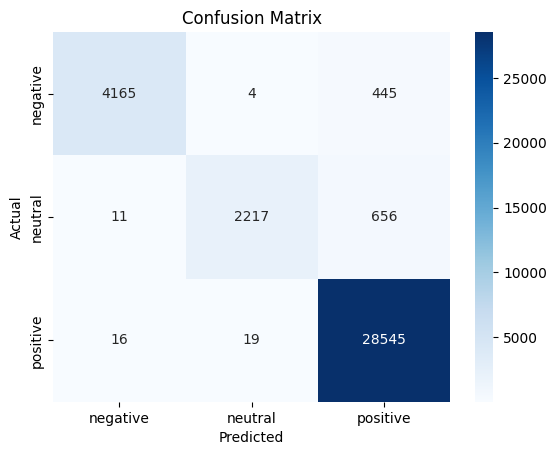

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Features and labels
X = df['Review'].astype(str)
y = df['sentiment']

# Vectorize text
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_vec = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [ ]:
NAIVE BAYES CLASSIFICATION ALGORITHM

In [45]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

print("Naive Bayes Report:")
print(classification_report(y_test, nb_preds))


Naive Bayes Report:
              precision    recall  f1-score   support

    negative       0.99      0.86      0.92      4614
     neutral       0.96      0.62      0.76      2884
    positive       0.94      1.00      0.97     28580

    accuracy                           0.95     36078
   macro avg       0.97      0.82      0.88     36078
weighted avg       0.95      0.95      0.95     36078



SUPPORT VECTOR MACHIME

In [46]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

print("SVM Report:")
print(classification_report(y_test, svm_preds))


SVM Report:
              precision    recall  f1-score   support

    negative       0.99      0.90      0.95      4614
     neutral       0.99      0.77      0.87      2884
    positive       0.96      1.00      0.98     28580

    accuracy                           0.97     36078
   macro avg       0.98      0.89      0.93     36078
weighted avg       0.97      0.97      0.97     36078



RANDOM FOREST

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, rf_preds))


Random Forest Report:
              precision    recall  f1-score   support

    negative       0.99      0.90      0.95      4614
     neutral       0.99      0.77      0.87      2884
    positive       0.96      1.00      0.98     28580

    accuracy                           0.97     36078
   macro avg       0.98      0.89      0.93     36078
weighted avg       0.97      0.97      0.97     36078



K-NEAREST NEIGHBOURS

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

print("KNN Report:")
print(classification_report(y_test, knn_preds))


KNN Report:
              precision    recall  f1-score   support

    negative       0.99      0.90      0.94      4614
     neutral       0.75      0.92      0.83      2884
    positive       0.98      0.97      0.98     28580

    accuracy                           0.96     36078
   macro avg       0.91      0.93      0.92     36078
weighted avg       0.97      0.96      0.96     36078



MODEL COMPARISION

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Train each model
for name, model in models.items():
    model.fit(X_train, y_train)



Confusion Matrix for Logistic Regression:


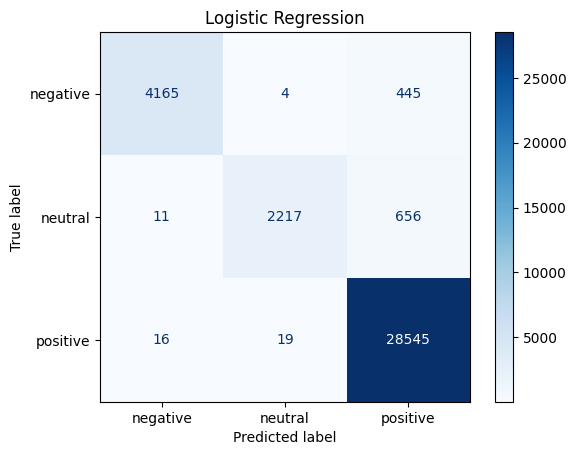


Confusion Matrix for Naive Bayes:


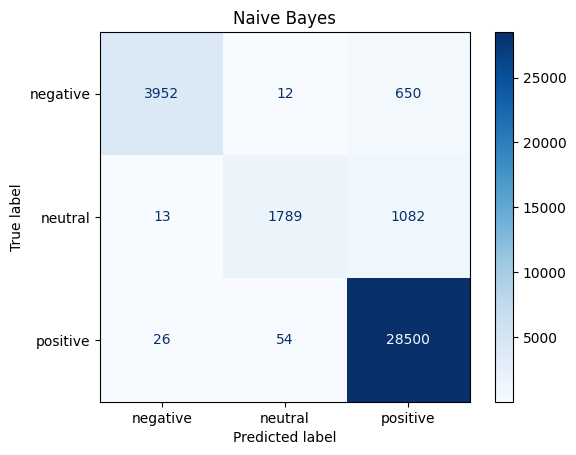


Confusion Matrix for Random Forest:


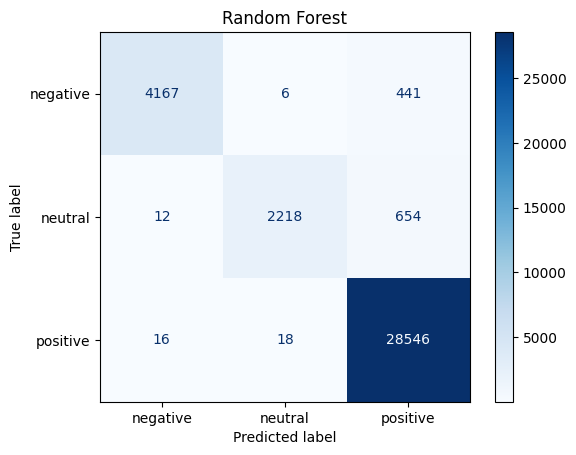


Confusion Matrix for Support Vector Machine:


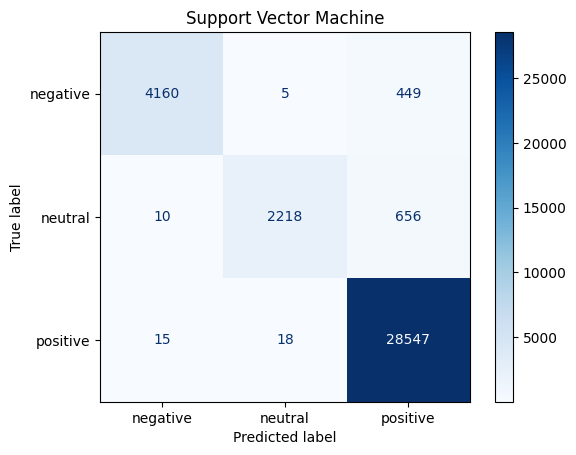

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for name, model in models.items():
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    print(f"\nConfusion Matrix for {name}:")
    disp.plot(cmap='Blues')
    plt.title(name)
    plt.grid(False)
    plt.show()


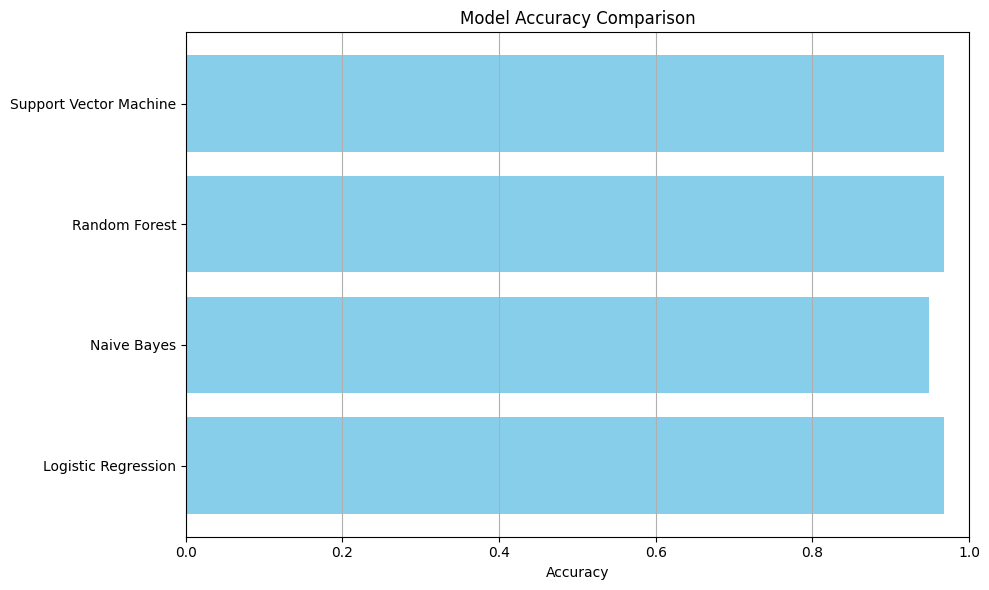

In [54]:
import matplotlib.pyplot as plt

# Collect accuracy scores
from sklearn.metrics import accuracy_score

model_names = []
accuracies = []

for name, model in models.items():
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    model_names.append(name)
    accuracies.append(acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xlim(0, 1)
plt.grid(axis='x')
plt.tight_layout()
plt.show()


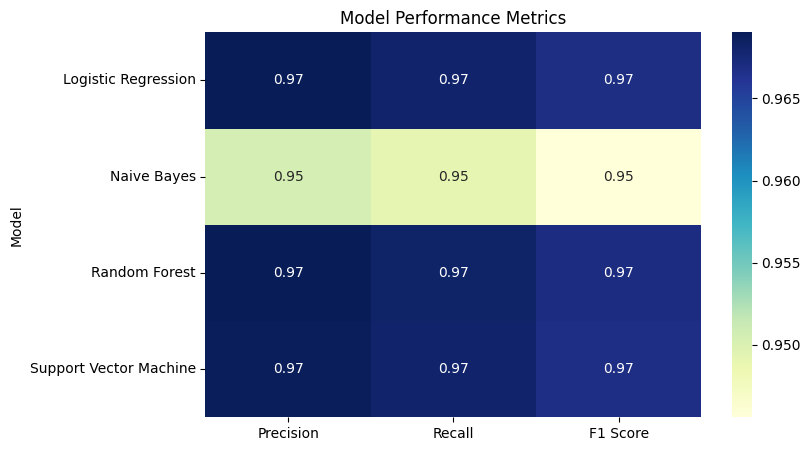

In [55]:
from sklearn.metrics import precision_recall_fscore_support
import seaborn as sns
import pandas as pd

# Collect metrics
report_data = []

for name, model in models.items():
    preds = model.predict(X_test)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, preds, average='weighted')
    report_data.append({
        'Model': name,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

report_df = pd.DataFrame(report_data)
report_df.set_index('Model', inplace=True)

# Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(report_df, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Model Performance Metrics")
plt.show()
